<a href="https://www.kaggle.com/code/mudasarsabir/titanic-competition-by-random-forest?scriptVersionId=237382957" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🏆 Titanic Competition: Advanced Classification Using Random Forest

In this guide, we’ll go through the steps of building and optimizing a **Random Forest Classifier** for the Titanic dataset. The goal is to predict the survival of passengers based on various features using a machine learning pipeline.

# 0.1: Importing Required Libraries for Decision Tree Classification

In this section, we import the necessary libraries and tools for performing data analysis, building and evaluating a decision tree classifier, and visualizing the results.

### Core Libraries
- **`numpy`**:  
  A fundamental package for scientific computing, used for working with arrays and performing mathematical operations.

- **`pandas`**:  
  A powerful data manipulation and analysis library, essential for handling structured data in the form of DataFrames.

### Visualization Libraries
- **`matplotlib.pyplot`**:  
  A plotting library that enables the creation of static, animated, and interactive visualizations in Python.

- **`seaborn`**:  
  A high-level data visualization library built on top of `matplotlib`, designed to make creating attractive statistical plots easy.  
  - **`sns.set()`**: Sets a clean and modern theme for the plots, making them easier to read.

  *(Note: The `%matplotlib inline` directive is used for inline plotting in Jupyter Notebooks. It can be omitted if not using Jupyter.)*

### Scikit-Learn Metrics
- **`accuracy_score`**:  
  A function to calculate the accuracy of a classifier, measuring the proportion of correct predictions.

- **`f1_score`**:  
  A metric that combines precision and recall, providing the harmonic mean of the two.

- **`recall_score`**:  
  A metric that calculates recall (True Positive Rate), reflecting the model's ability to identify relevant positive instances.

- **`precision_score`**:  
  A metric that calculates precision, the ability of the model to correctly identify positive instances.

- **`confusion_matrix`**:  
  A function to compute the confusion matrix, which shows the true positives, false positives, true negatives, and false negatives.

- **`classification_report`**:  
  A function that provides a detailed summary of key classification metrics such as precision, recall, and F1-score.

- **`roc_curve`**:  
  A function to compute the Receiver Operating Characteristic (ROC) curve, used for evaluating classification performance.

- **`auc`**:  
  A function to calculate the Area Under the Curve (AUC) for the ROC curve, summarizing the overall performance.

- **`roc_auc_score`**:  
  A function that computes the AUC score directly based on the true labels and predicted probabilities.

- **`make_scorer`**:  
  A function to create custom scoring functions that can be used in model evaluation, particularly for cross-validation.

### Scikit-Learn Model and Tools
- **`DecisionTreeClassifier`**:  
  A decision tree model used for classification tasks, where the algorithm splits the data at each node based on feature values to create a tree-like structure.

- **`RandomForestClassifier`**:  
  An ensemble classifier that builds multiple decision trees and merges their outputs to improve accuracy and prevent overfitting.

- **`cross_val_score`**:  
  A function to perform cross-validation, where the model is trained and evaluated on different subsets of the data to assess its robustness.

- **`train_test_split`**:  
  A utility function that splits the dataset into training and testing sets, allowing for model evaluation on unseen data.

- **`GridSearchCV`** & **`RandomizedSearchCV`**:  
  Tools for hyperparameter tuning by searching through combinations of parameters using cross-validation.

- **`from sklearn import tree`**:  
  The `tree` module in `scikit-learn` contains the tools for decision tree algorithms, including the `DecisionTreeClassifier` and `plot_tree` functions. This import is essential for using the decision tree classifier and visualizing the resulting tree structure.

These libraries and functions form the foundation for building, evaluating, and visualizing a decision tree classification model.


In [1]:
# === Core Libraries ===
import numpy as np
import pandas as pd

# === Visualization Libraries ===
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for consistent plots
sns.set()

# Uncomment the following line if using Jupyter Notebook
# %matplotlib inline

# === Scikit-Learn Components ===

# --- Metrics ---
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    make_scorer
)

# --- Models ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- Model Selection Tools ---
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

# --- Utilities ---
from sklearn import tree  # Useful for decision tree visualization


# 0.2: Plotting the ROC Curve and Calculating AUC

This section defines a reusable function to plot the ROC (Receiver Operating Characteristic) curve and compute the AUC (Area Under the Curve) for a given set of actual labels and predicted probabilities.

### 📈 Function: `plot_roc_curve()`
This function visualizes the model's classification performance across different thresholds and highlights the decision point closest to a threshold of 0.5.

### Parameters:
- **`y_actual_values`** *(np.ndarray)*:  
  The ground truth labels for the classification task (e.g., 0s and 1s).

- **`predicted_probability`** *(np.ndarray)*:  
  The predicted probabilities of the positive class output by the model (usually from `.predict_proba()` or `.decision_function()`).

### Key Steps:
1. **Compute ROC Curve Metrics**  
   Uses `roc_curve()` to calculate:
   - **FPR**: False Positive Rate
   - **TPR**: True Positive Rate (Recall)
   - **Thresholds**: Probability thresholds at which these metrics were calculated

2. **Compute AUC Score**  
   Uses `roc_auc_score()` to calculate a single summary value that represents the overall quality of the classifier.

3. **Plot the ROC Curve**  
   - Plots the ROC curve (TPR vs. FPR) with the AUC score in the legend
   - Plots a diagonal dashed red line representing a random guess classifier
   - Highlights the point on the curve corresponding to the threshold closest to **0.5**, typically used in binary classification

4. **Display the Plot**  
   Adds axis labels, a title, and a legend for clarity.


In [2]:
def plot_roc_curve(
    y_actual_values: np.ndarray, 
    predicted_probability: np.ndarray, 
    title: str = " "
) -> None:
    """
    Plots the ROC curve and displays the AUC for a binary classifier.

    Parameters
    ----------
    y_actual_values : np.ndarray
        Ground truth binary labels (0 or 1).
    
    predicted_probability : np.ndarray
        Predicted probabilities for the positive class (class 1).

    title : str, optional
        Title for the plot. Default is " ".

    Returns
    -------
    None
        Displays the ROC curve plot.
    """
    # Calculate False Positive Rate, True Positive Rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_actual_values, predicted_probability)
    
    # Compute Area Under the Curve
    auc_score = roc_auc_score(y_actual_values, predicted_probability)

    # Initialize plot
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

    # Highlight the point closest to threshold = 0.5
    closest_idx = np.argmin(np.abs(thresholds - 0.5))
    plt.scatter(
        fpr[closest_idx], tpr[closest_idx],
        color='lightgreen', edgecolors='red', s=100,
        label=f'Threshold ≈ 0.5 (T={thresholds[closest_idx]:.2f})'
    )

    # Format plot
    plt.title(title + ' Receiver Operating Characteristic (ROC) (AUC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xticks(np.round(np.arange(0, 1.05, 0.05), 2), rotation=90)
    plt.yticks(np.round(np.arange(0, 1.05, 0.05), 2))
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


# 0.3: Generating a Complete Classification Report and Evaluation Summary

In this section, we define a utility function `evaluate_model_performance()` to display a comprehensive set of evaluation metrics and visual summaries for binary classification models. This function streamlines model assessment by combining multiple reporting elements into a single step.

### 🧠 Function: `evaluate_model_performance()`
This function outputs key classification metrics including the classification report, confusion matrix (with labeled cells), accuracy, precision, recall, F1 score, as well as True Positive Rate (TPR) and False Positive Rate (FPR). These metrics are essential for understanding a model’s strengths and weaknesses.

---

### 📥 Parameters:
- **`y_actual_values`** *(array-like)*:  
  The actual (true) labels from the test set.

- **`predictions`** *(array-like)*:  
  The predicted labels generated by the classifier.

---

### 📤 Outputs:
- **Classification Report**:  
  Displays precision, recall, F1-score, and support for each class.

- **Labeled Confusion Matrix**:  
  Shows counts of:
  - True Positives (TP)
  - False Positives (FP)
  - False Negatives (FN)
  - True Negatives (TN)

- **Evaluation Metrics**:
  - **Accuracy**: Overall correctness of the classifier.
  - **Precision**: Correctness of positive predictions.
  - **Recall (Sensitivity / TPR)**: Coverage of actual positive cases.
  - **F1 Score**: Harmonic mean of precision and recall.

- **TPR (True Positive Rate)**:  
  Measures how effectively the model identifies positive samples.  
  **Formula**: `TPR = TP / (TP + FN)`

- **FPR (False Positive Rate)**:  
  Measures how often negative samples are incorrectly labeled as positive.  
  **Formula**: `FPR = FP / (FP + TN)`

  

In [3]:
def evaluate_model_performance(y_actual_values, predictions, predicted_probabilities):
    """
    This function generates a comprehensive classification report, confusion matrix, and key evaluation metrics 
    for binary classification models, including accuracy, precision, recall, F1 score, True Positive Rate (TPR),
    and False Positive Rate (FPR).
    
    Args:
    y_actual_values (array-like): The actual labels from the test set.
    predictions (array-like): The predicted labels from the classifier.

    Outputs:
    - Classification report.
    - Confusion matrix and its elements.
    - Evaluation metrics (Accuracy, Precision, Recall, F1 Score).
    - True Positive Rate (TPR) and False Positive Rate (FPR).

    return:
    -accuracy
    -precision
    -recall
    -f1_score_
    
    """

    # Compute Area Under the Curve
    auc_score = roc_auc_score(y_actual_values, predicted_probabilities)
    
    # Classification Report
    print('\n [--Classification Report--] \n')
    print(classification_report(y_actual_values, predictions))
    
    # Confusion Matrix and elements
    tn, fp, fn, tp = confusion_matrix(y_actual_values, predictions).ravel()
    
    # Confusion Matrix Display
    print('\n [----Confusion Matrix-----] \n')
    print(pd.DataFrame({"pred_Survived (TP/FP)": ['TP ' + str(tp), 'FP ' + str(fp)], 
                        "pred_Not Survived (FN/TN)": ['FN ' + str(fn), 'TN ' + str(tn)]},
                       index=["Survived", "Not Survived"]), '\n')
    
    # Metrics Calculation
    print('\n [---------Metrics---------] \n')
    accuracy = accuracy_score(y_actual_values, predictions)
    precision = precision_score(y_actual_values, predictions)
    recall = recall_score(y_actual_values, predictions)
    f1_score_ = f1_score(y_actual_values, predictions)
    
    print("Accuracy:         ", accuracy)
    print("Precision:        ", precision)
    print("Recall:           ", recall)
    print("F1 Score:         ", f1_score_)
    print("Area Under Curve: ", auc_score)
    
    # TPR and FPR Calculation
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    
    print("\n------------------------------ \n\nHigher TPR (True Positive Rate) is better!")
    print("TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').")
    print("In other words, it tells us how well the model captures true positive cases (sensitivity).")
    print("\nFormula (TPR = TP / (TP + FN))")
    print("\n(True Positive Rate) TPR: %0.3f%%" % (tpr * 100), '\n\n------------------------------')
    
    print("\nLower FPR (False Positive Rate) is better!")
    print("It measures the proportion of actual negative cases ('No') that were incorrectly predicted as positive ('Yes').")
    print("\nFormula (FPR = FP / (TN + FP))")
    print("\n(False Positive Rate) FPR: %0.3f%%" % (fpr * 100), '\n\n------------------------------')

    return accuracy, precision, recall, f1_score_, auc_score


# 0.4`find_optimal_parameters_for_random_forest_grid_search`

Perform hyperparameter tuning for a **Random Forest Classifier** using `GridSearchCV`.

This function conducts a grid search over specified hyperparameter ranges to determine the best-performing configuration for a `RandomForestClassifier`. It returns the trained model with the best-found parameters.

---

### 🔧 Parameters

| Name | Type | Description |
|------|------|-------------|
| `x_train` | `pd.DataFrame` | Feature matrix for training. |
| `y_train` | `pd.Series` | Target labels for training. |
| `number_of_estimators_range` | `list` | List or range of values for `n_estimators` (number of trees). |
| `maximum_depth_range` | `list` | List or range of values for `max_depth` (tree depth). |
| `minimum_samples_leaf_range` | `list` | List or range of values for `min_samples_leaf`. |
| `scoring_method` | `str` | Scoring metric (e.g., `'accuracy'`, `'roc_auc'`). |
| `random_state_value` | `int` | Random seed for reproducibility. |

---

### 📦 Returns

- **`GridSearchCV.best_estimator_`** (`RandomForestClassifier`)  
  The trained model with the best-performing hyperparameters.

---

### ▶️ Example Usage

```python
best_model = find_optimal_parameters_for_random_forest_grid_search(
    x_train=xtraining_data,
    y_train=ytraining_data,
    number_of_estimators_range=list(range(1, 10, 4)),
    maximum_depth_range=list(range(1, 10, 3)),
    minimum_samples_leaf_range=list(range(1, 10, 2)),
    scoring_method='accuracy',
    random_state_value=100
)


In [4]:

def find_optimal_parameters_for_random_forest_grid_search(x_train: pd.DataFrame, y_train: pd.Series, 
                                                          maximum_depth_range: list, 
                                                          minimum_samples_leaf_range: list,
                                                          number_of_estimators_range: list,
                                                          scoring_method: str, 
                                                          random_state_value: int) -> GridSearchCV:
    """
    Perform hyperparameter tuning for a Random Forest Classifier using GridSearchCV.
    
    This function performs a grid search to find the optimal hyperparameters 
    for a Random Forest model based on the given parameter ranges. It returns 
    the fitted model and logs the best parameters and performance score.
    
    Parameters:
    - x_train: pandas DataFrame or numpy array
      Training features
    - y_train: pandas DataFrame or numpy array
      Training labels (target variable)
    - maximum_depth: list or range
      Range of values for the maximum depth of each tree
    - minimum_samples_leaf: list or range
      Range of values for the minimum number of samples required at a leaf node
    - number_of_estimators_range: list or range
      Range of values for the number of estimators (trees in the forest)
    - scoring_method: str
      Scoring method to evaluate the model (e.g., 'accuracy', 'roc_auc')
    - random_state_value: int
      Random state for reproducibility
    
    Returns:
    - RandomForestClassifier object
      The model with the best-found parameters after grid search.

    Example:
    - find_optimal_parameters_for_random_forest_grid_search(
        x_train=xtraining_data,
        y_train=ytraining_data,
        maximum_depth_range=list(range(1, 10, 3)),
        minimum_samples_leaf_range=list(range(1, 10, 2)),
        number_of_estimators_range=list(range(1, 10, 4)),
        scoring_method='accuracy',
        random_state_value=100)
        
    """
    
    print("Starting grid search for optimal parameters...")
    
    # Define the hyperparameter grid
    optimum_parameters_find_for_grid_search_cv = {
        "n_estimators": number_of_estimators_range,
        "max_depth": maximum_depth_range,
        "min_samples_leaf": minimum_samples_leaf_range
    }
    
    # Initialize the Random Forest model
    random_forest_model = RandomForestClassifier(random_state=random_state_value)
    
    # Initialize GridSearchCV for hyperparameter tuning
    random_forest_model_with_grid_search_cv = GridSearchCV(
        random_forest_model, 
        optimum_parameters_find_for_grid_search_cv,
        cv=5,  # 5-fold cross-validation
        scoring=scoring_method,
        n_jobs=-1,  # Utilize all CPU cores for faster execution
        verbose=10,  # Provide detailed output during execution
    )
    
    # Fit the model to the data
    random_forest_model_with_grid_search_cv.fit(x_train, y_train.values.ravel())
        
    # Log the best parameters and score
    best_params = random_forest_model_with_grid_search_cv.best_params_
    best_score = random_forest_model_with_grid_search_cv.best_score_
    
    print(f"✅ Best Parametersparameters found: {best_params}")
    print(f"🏆 Best {scoring_method} score: {best_score}")
    
    # Return the fitted model with the best parameters
    return random_forest_model_with_grid_search_cv.best_estimator_



# 0.5 📊 plot_bar_chart Function Description

The `plot_bar_chart` function is designed to generate a professional and customizable bar chart using Seaborn and Matplotlib. It is ideal for visualizing feature importance or any other comparison between categorical and numerical data.

### 🔧 Parameters

- **`dataframe`** (`pd.DataFrame`):  
  The input DataFrame containing the data to plot.

- **`x_label`** (`str`):  
  The name of the column to be displayed on the x-axis (e.g., feature names).

- **`y_label`** (`str`):  
  The name of the column to be displayed on the y-axis (e.g., importance scores).

- **`title`** (`str`):  
  The main title of the plot. The phrase "Feature Importance" is automatically appended.

- **`color`** (`str`, optional):  
  The color of the bars. Default is `'b'` (blue).

- **`figsize`** (`tuple`, optional):  
  The size of the plot in inches. Default is `(10, 5)`.

- **`xlabel_text`** (`str`, optional):  
  Custom label for the x-axis. If not provided, defaults to the value of `x_label`.

- **`ylabel_text`** (`str`, optional):  
  Custom label for the y-axis. If not provided, defaults to the value of `y_label`.

- **`rotation`** (`int`, optional):  
  The rotation angle for x-axis labels to improve readability. Default is `90` degrees.

### 📤 Returns

- **None**  
  This function directly displays the bar chart and does not return any value.

### ✅ Example Use Case

This function is commonly used to visualize feature importance values returned from machine learning models (e.g., Random Forests). It helps identify which features contribute the most to predictions in an interpretable way.



In [5]:
def plot_bar_chart(
    dataframe: pd.DataFrame,
    x_label: str,
    y_label: str,
    title: str,
    color: str = 'b',
    figsize: tuple = (10, 5),
    xlabel_text: str = None,
    ylabel_text: str = None,
    rotation: int = 90
) -> None:
    """
    Plots a bar chart using seaborn and matplotlib for visualizing data relationships.

    Parameters:
    ----------
    dataframe : pd.DataFrame
        The data source containing the values to plot.
    x_label : str
        The column name to use on the x-axis.
    y_label : str
        The column name to use on the y-axis.
    title : str
        The base title for the chart. 'Feature Importance' is appended automatically.
    color : str, optional
        The color of the bars (default is 'b' for blue).
    figsize : tuple, optional
        Size of the plot figure in inches (default is (10, 5)).
    xlabel_text : str, optional
        Custom label for the x-axis. Defaults to `x_label`.
    ylabel_text : str, optional
        Custom label for the y-axis. Defaults to `y_label`.
    rotation : int, optional
        Rotation angle for x-axis tick labels (default is 90 degrees).

    Returns:
    -------
    None
        Displays the bar chart.
    """
    if x_label not in dataframe.columns or y_label not in dataframe.columns:
        raise ValueError(f"'{x_label}' or '{y_label}' not found in the DataFrame columns.")

    plt.figure(figsize=figsize)
    sns.barplot(x=x_label, y=y_label, data=dataframe, color=color)

    plt.xlabel(xlabel_text if xlabel_text else x_label, fontsize=12)
    plt.ylabel(ylabel_text if ylabel_text else y_label, fontsize=12)
    plt.title(f"{title}", fontsize=14)
    plt.xticks(rotation=rotation)

    plt.tight_layout()
    plt.show()


## 1: Loading and Preparing the Titanic Dataset

This section loads and prepares the cleaned Titanic dataset for analysis and modeling.

#### Steps:

- **Load the Dataset**  
  The cleaned dataset is read from a CSV file using `pandas`:


In [6]:
# === Load and Prepare Dataset ===

# Load the cleaned Titanic dataset
data = pd.read_csv('/kaggle/input/titanic-dataset/titanic_clean.csv')

# Create a working copy of the original data
df = data.copy()

# Preview the first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


## 2: One-Hot Encoding of Categorical Features

This step transforms categorical variables into a numerical format using one-hot encoding, which is essential for many machine learning models.

#### Steps:

- **Identify Categorical Columns**  
  A list of categorical columns to be one-hot encoded:


In [7]:
# One-hot encode categorical features and convert all resulting columns to integer type
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat']
dataframe_OneHot = pd.get_dummies(df, columns=categorical_columns)

# Ensure all values are of integer type (0 or 1)
dataframe_OneHot = dataframe_OneHot.astype(int)

# Display the first few rows of the encoded DataFrame
dataframe_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


## 3: Creating a Working Copy of the Encoded DataFrame

To ensure flexibility and avoid modifying the original one-hot encoded dataset directly, a working copy is created:


In [8]:
# Create a copy of the one-hot encoded DataFrame
df = dataframe_OneHot.copy()

## 4: Separating Features and Target Variable

The dataset is split into input features (`X`) and the target variable (`Y`) for model training.

- **Features (`X`)**:  
  All columns except `'PassengerId'` and `'Survived'` are used as input features:


In [9]:
# Separate features and target variable
X = df.drop(['PassengerId', 'Survived'], axis=1)  # Features
Y = df[['Survived']]  # Target variable

### - **`random_state`**:  
  This parameter is used to ensure reproducibility of results. By setting a fixed `random_state`, the Decision Tree algorithm produces the same output each time the code is run, which is crucial for consistent evaluation and comparison of model performance.


In [10]:
random_state_value = 30

## 5: Splitting the Dataset into Training and Testing Sets

The dataset is divided into training and testing subsets to evaluate model performance on unseen data.

- **Use `train_test_split` from Scikit-learn**:  
  The feature set `X` and target variable `Y` are split with 70% for training and 30% for testing:


In [11]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=random_state_value, shuffle=True
)

# Display the shape of each split
print("Training set shape:", xtrain.shape, ytrain.shape)
print("Testing set shape:", xtest.shape, ytest.shape)

Training set shape: (623, 30) (623, 1)
Testing set shape: (268, 30) (268, 1)



# 6: Initializing the Random Forest Classifier

In this section, we initialize the **Random Forest Classifier** — a powerful ensemble learning method used for classification and regression tasks. It works by creating multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees.

---

### 🌲 Model: `RandomForestClassifier()`

- **RandomForestClassifier**:
  An ensemble classifier that builds multiple decision trees and merges them to get a more accurate and stable prediction.

- **random_state**:
  - A seed value used to ensure **reproducibility**.
  - Setting this value ensures that the model gives the same results every time you run the code.
  - Useful for consistent evaluation during experimentation.


In [12]:
# Initialize a Random Forest classifier with a fixed random state for reproducibility
random_forest_base_model = RandomForestClassifier(random_state=random_state_value)

# 7: Training the Random Forest Classifier

In this step, we train the **Random Forest Classifier** using the training dataset. The model learns from the features and corresponding labels to identify underlying patterns for making predictions on new, unseen data.

---

### 🛠️ Method: `.fit()`

- The `fit()` function is used to train the model on the given input features and target labels.
- It builds multiple decision trees from random subsets of the data and aggregates their results.


In [13]:
# Train the Random Forest Classifier model using the training data
# The fit method trains the model by learning patterns from the features (xtrain)
# and corresponding target values (ytrain)
# .values.ravel() converts the target variable to a 1D array format required by the model
random_forest_base_model.fit(xtrain, ytrain.values.ravel())

RandomForestClassifier(random_state=30)

# 8: Making Predictions with the Trained Random Forest Model

In this section, we use the trained **Random Forest Classifier** to make predictions on the test dataset. We extract both the predicted labels and the probability estimates for the positive class.

---

### 🛠️ Methods: `.predict()` and `.predict_proba()`

1. **`.predict()`**:
   - The `predict()` function returns the predicted class labels for the test dataset based on the learned patterns.

2. **`.predict_proba()`**:
   - The `predict_proba()` function returns the predicted probabilities for each class.
   - We extract the probability for the positive class (class 1) for evaluating model confidence.


In [14]:
# Predict the labels for the test data using the trained Random Forest model
random_forest_base_model_predictions: np.ndarray = random_forest_base_model.predict(xtest)

# Extract probability estimates for the positive class (class 1)
# The predict_proba method returns probabilities for all classes, so we select only the positive class
random_forest_base_model_predictions_probabilities: np.ndarray = random_forest_base_model.predict_proba(xtest)[:, 1]

## 9: Call the `evaluate_model_performance` Function to Generate the Classification Report and Evaluation Metrics

To generate the classification report and evaluation metrics, we can call the `evaluate_model_performance` function as shown below:


In [15]:
# Call the evaluate_model_performance function to generate the classification report and evaluation metrics
# rf_bs_m_ = random_forest_base_model_
rf_bs_m_accuracy, rf_bs_m_precision, rf_bs_m_recall, rf_bs_m_f1_score, rf_bs_m_auc = evaluate_model_performance( 
                                                                        y_actual_values = ytest,
                                                                        predictions = random_forest_base_model_predictions,
                                                                        predicted_probabilities=random_forest_base_model_predictions_probabilities)


 [--Classification Report--] 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       164
           1       0.78      0.70      0.74       104

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268


 [----Confusion Matrix-----] 

             pred_Survived (TP/FP) pred_Not Survived (FN/TN)
Survived                     TP 73                     FN 31
Not Survived                 FP 20                    TN 144 


 [---------Metrics---------] 

Accuracy:          0.8097014925373134
Precision:         0.7849462365591398
Recall:            0.7019230769230769
F1 Score:          0.7411167512690354
Area Under Curve:  0.872156425891182

------------------------------ 

Higher TPR (True Positive Rate) is better!
TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').
In other words

## 10: Call the `plot_roc_curve` Function to Plot the ROC Curve

To visualize the ROC curve for the **Random Forest Classifier**, we call the `plot_roc_curve` function with the actual test labels (`ytest`) and the predicted probabilities (`random_forest_predicted_probability`).

### 📈 ROC Curve for Random Forest

The ROC (Receiver Operating Characteristic) Curve helps evaluate the performance of the **Random Forest Classifier** in distinguishing between the positive and negative classes.

- The **ROC Curve** plots the **True Positive Rate (Recall)** against the **False Positive Rate** at various threshold levels.
  
- The **AUC (Area Under the Curve)** provides a single scalar value to summarize performance:
  - **AUC ≈ 1.0**: Excellent classification ability.
  - **AUC ≈ 0.5**: No better than random guessing.


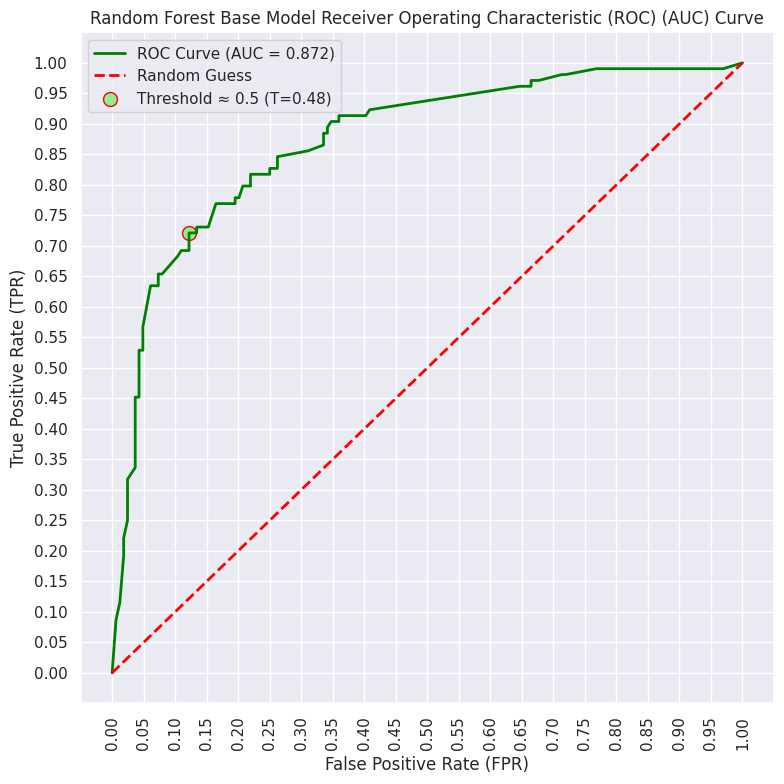

In [16]:
# Call the plot_roc_curve function with the actual labels and predicted probabilities
plot_roc_curve(
    y_actual_values=ytest,
    predicted_probability=random_forest_base_model_predictions_probabilities,
    title='Random Forest Base Model'
)

## 11: Plot the Decision Tree with Specified Size and Features

To visualize a specific decision tree from the **Random Forest model**, we use the `plot_tree` function from `sklearn.tree`, which generates a graphical representation of the tree. The following code creates a subplot with a specified size, and the decision tree is plotted within this subplot.


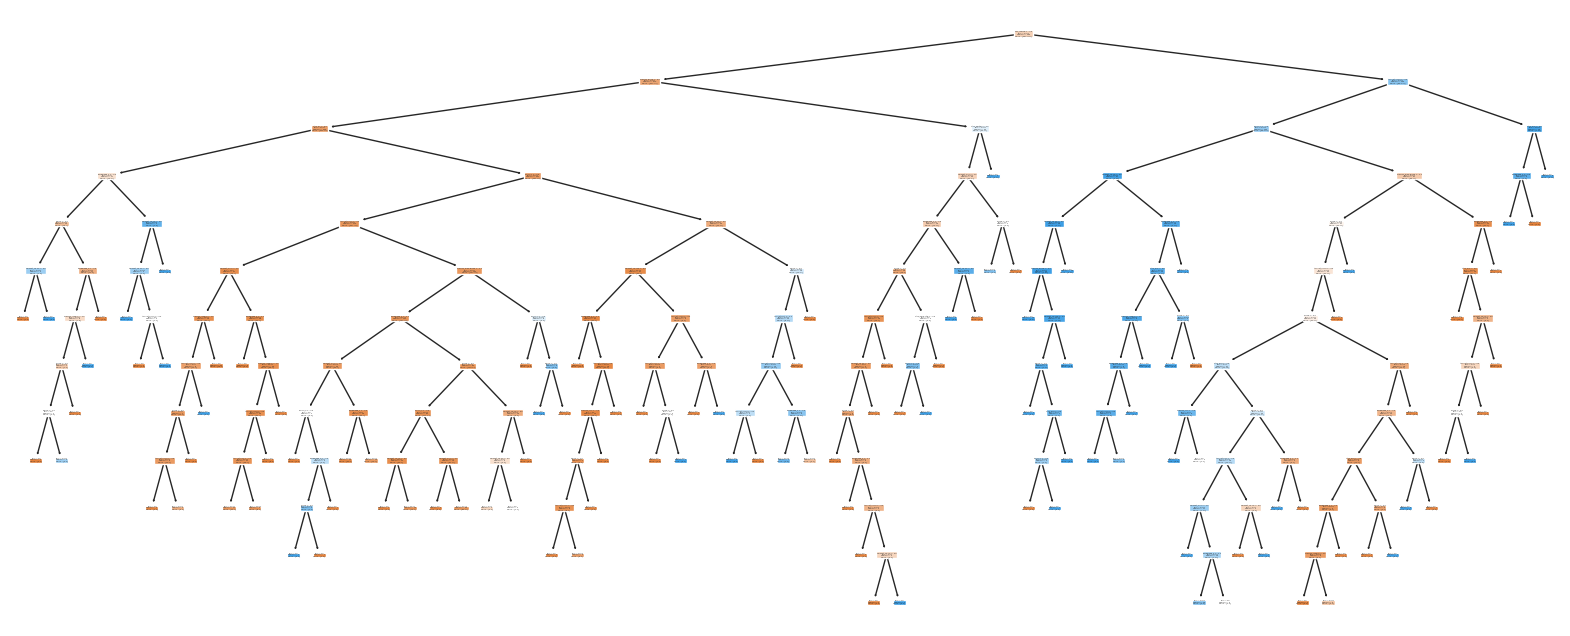

In [17]:
# Select a specific tree (index 1) from the random forest model for visualization
selected_tree = random_forest_base_model.estimators_[1]

# Set up the visualization parameters
fig_size = (20, 8)
resolution = 100
feature_list = list(X.columns)

# Create the visualization
fig, ax = plt.subplots(figsize=fig_size, dpi=resolution)
tree.plot_tree(
    decision_tree=selected_tree,
    feature_names=feature_list,
    filled=True,
    ax=ax
)

# Display the tree visualization
plt.show()

## 12: Retrieve the Feature Importances from the Trained Random Forest Model

To understand the contribution of each feature in the decision-making process of the trained decision tree model, we can retrieve the feature importances using the `feature_importances_` attribute.


In [18]:
# Get the feature importances from the trained decision tree model
random_forest_base_model.feature_importances_

array([0.06343759, 0.03851171, 0.0317148 , 0.02039199, 0.05870929,
       0.10002238, 0.13120373, 0.02538357, 0.01362847, 0.02620791,
       0.01891739, 0.02800878, 0.11936842, 0.0255865 , 0.00831637,
       0.02005102, 0.02360664, 0.03501609, 0.02149196, 0.02099152,
       0.02003163, 0.00891026, 0.01845073, 0.01688072, 0.01378512,
       0.0165951 , 0.02429844, 0.0255437 , 0.02155389, 0.00338426])

## 13: Print the Column Names of the Input Data `X`

To display the column names of the input dataset `X`, you can use the following code:


In [19]:
# Print the column names of the input data X
X.columns

Index(['SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare Title',
       'GrpSize_couple', 'GrpSize_group', 'GrpSize_large group',
       'GrpSize_solo', 'FareCat_0-10', 'FareCat_10-25', 'FareCat_100+',
       'FareCat_25-40', 'FareCat_40-70', 'FareCat_70-100', 'AgeCat_0-16',
       'AgeCat_16-32', 'AgeCat_32-48', 'AgeCat_48-64', 'AgeCat_64+'],
      dtype='object')

## 14: Create a DataFrame with Feature Names and Their Corresponding Importance Scores

To analyze the importance of each feature in the trained decision tree model, we can create a DataFrame containing the feature names and their corresponding importance scores. The following code sorts the features by importance in descending order and displays those with non-zero importance.


In [20]:
# Create a DataFrame with feature names and their corresponding importance scores
important_features = pd.DataFrame({
    'Feature Names': X.columns, 
    'Importance': random_forest_base_model.feature_importances_
})

# Sort the features by importance in descending order and reset the index
important_features_sorted = important_features.sort_values("Importance", ascending=False, ignore_index=True)

# Filter and display features with non-zero importance
important_features_sorted[important_features_sorted['Importance'] > 0]

,Feature Names,Importance
0,Sex_male,0.131204
1,Title_Mr,0.119368
2,Sex_female,0.100022
3,SibSp,0.063438
4,Pclass_3,0.058709
5,Parch,0.038512
6,GrpSize_large group,0.035016
7,Pclass_1,0.031715
8,Title_Miss,0.028009
9,Embarked_S,0.026208


## 15: Plot the Feature Importance using a Bar Plot

To visualize the importance of each feature in the Decision Tree model, we can use a bar plot. This will show the features along the x-axis and their corresponding importance scores on the y-axis, making it easier to interpret the influence of each input variable.

### 🌳 Decision Tree Classifier - Feature Importance Visualization

This bar chart displays the **feature importance scores** derived from a trained Decision Tree Classifier. It helps identify which features had the greatest impact on the model's predictions.

### 🔢 Data Input

- **`important_features_sorted`**:  
  A `pandas.DataFrame` containing feature names and their corresponding importance scores, sorted in descending order for clarity.

### 📊 Plot Details

- **X-axis**: `"Feature Names"` — Names of the features used in the model.
- **Y-axis**: `"Importance"` — Numerical values representing each feature's importance score.
- **Title**: `'Decision Tree Classifier Feature Importance'` — A descriptive heading that provides context for the visualization.

### ✅ Purpose

This chart allows for easy visual interpretation of which input variables contributed most to the decision-making process of the classifier. It is particularly useful for:

- Model explainability  
- Feature selection and engineering  
- Stakeholder presentations and model transparency


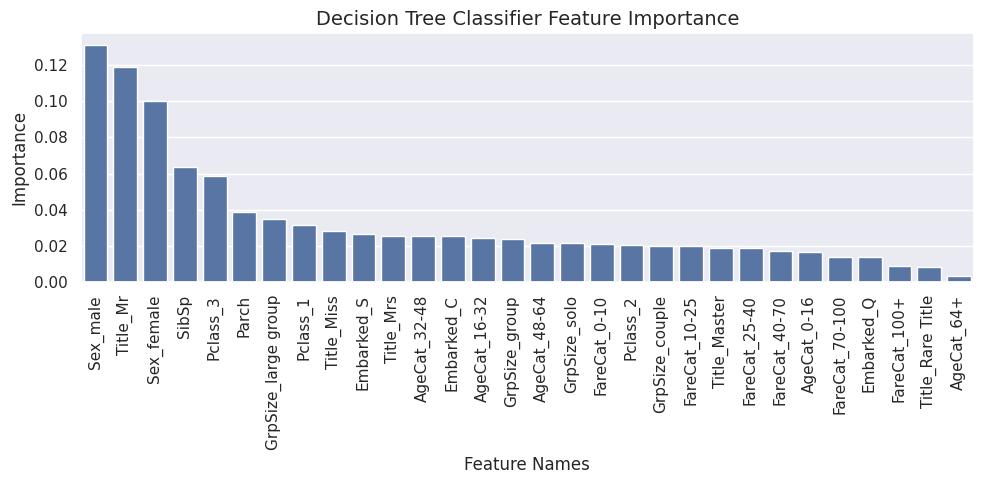

In [21]:
# Create a bar chart to visualize feature importance from the Decision Tree Classifier
plot_bar_chart(
    dataframe=important_features_sorted,
    x_label="Feature Names",
    y_label="Importance",
    title='Decision Tree Classifier Feature Importance'
)

# 16: Hyperparameter Tuning Methods

Hyperparameter tuning is essential for optimizing machine learning models. It involves selecting the best set of hyperparameters — values that control the learning process — to improve model performance. Several strategies can be used to search the hyperparameter space effectively.

### 1. Grid Search

**Grid Search** exhaustively tries all possible combinations of hyperparameter values specified in a predefined grid.

- **Pros**: Simple to implement, guarantees finding the best combination within the grid.
- **Cons**: Computationally expensive; scales poorly with a large number of parameters or values.

**Use Case**: Effective when the search space is small and well-defined.

### 2. Random Search

**Random Search** samples a fixed number of parameter combinations at random from a given distribution.

- **Pros**: More efficient than grid search for large spaces; often finds good results faster.
- **Cons**: Does not guarantee the best parameters; results may vary between runs.

**Use Case**: Suitable for large or less well-understood hyperparameter spaces.

### 3. Bayesian Optimization

**Bayesian Optimization** builds a probabilistic model of the objective function and selects the most promising hyperparameters to evaluate based on past results.

- **Pros**: More sample-efficient; intelligently balances exploration and exploitation.
- **Cons**: More complex to implement; requires additional libraries (e.g., `Optuna`, `Hyperopt`, `scikit-optimize`).

**Use Case**: Useful when evaluations are expensive and sample efficiency is critical.

### 4. Genetic Algorithms / Evolutionary Search

These methods mimic natural selection to evolve a population of hyperparameter sets over generations.

- **Pros**: Good at exploring complex and large search spaces.
- **Cons**: May require many evaluations; sensitive to parameter encoding.

**Use Case**: When traditional search methods fail in high-dimensional, non-convex spaces.

### 5. Automated Machine Learning (AutoML)

AutoML platforms (e.g., **Auto-sklearn**, **TPOT**, **H2O AutoML**) automate both model selection and hyperparameter tuning.

- **Pros**: End-to-end automation, often integrates ensembling and feature engineering.
- **Cons**: May lack transparency; slower; less control over specific components.

**Use Case**: Ideal for rapid prototyping or when domain expertise is limited.

### Summary

| Method             | Pros                                | Cons                                | Best For                              |
|--------------------|-------------------------------------|-------------------------------------|----------------------------------------|
| Grid Search        | Exhaustive, simple                  | Computationally expensive           | Small, discrete search spaces          |
| Random Search      | Faster, scalable                    | May miss optimal solution           | Large or continuous spaces             |
| Bayesian Optimization | Efficient, intelligent           | Complex, library-dependent          | Costly evaluations, sample efficiency  |
| Genetic Algorithms | Handles complex spaces              | Slower, needs tuning itself         | Non-convex, high-dimensional problems  |
| AutoML             | Easy to use, automated              | Opaque, resource-intensive          | Non-experts, rapid experimentation     |



# 17: Random Forest Model with Grid Search for Hyperparameter Tuning

This section outlines the process of optimizing a **Random Forest Classifier** using **GridSearchCV**, a powerful tool for systematic hyperparameter tuning in machine learning workflows.

### Objective

To identify the optimal combination of hyperparameters that maximize model performance. Specifically, we tune:

- `n_estimators`: The number of trees in the forest.
- `max_depth`: The maximum depth of each decision tree.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

### Methodology

1. Define a grid of candidate values for each hyperparameter.
2. Use **GridSearchCV** to evaluate all combinations of these values through cross-validation.
3. Score each configuration using **accuracy** as the evaluation metric.
4. Select the model with the highest cross-validated accuracy.

### Evaluation

- The model is trained and validated using **5-fold cross-validation** to ensure generalizability.
- The selected model is expected to strike a balance between **bias and variance**, avoiding overfitting or underfitting.

### Outcome

The result is a trained **Random Forest Classifier** with the best-performing hyperparameter configuration. This model can be further evaluated on unseen test data or deployed in production environments.


In [22]:
# Find optimal hyperparameters for Random Forest model using Grid Search CV
random_forest_model_with_grid_search_cv_tuned = find_optimal_parameters_for_random_forest_grid_search(
                                                                                  x_train=xtrain,
                                                                                  y_train=ytrain,
                                                                                  maximum_depth_range=list(range(1, 10, 3)),
                                                                                  minimum_samples_leaf_range=list(range(1, 10, 2)),
                                                                                  number_of_estimators_range=list(range(1, 110, 10)),
                                                                                  scoring_method='accuracy',
                                                                                  random_state_value=random_state_value)


Starting grid search for optimal parameters...
Fitting 5 folds for each of 165 candidates, totalling 825 fits
[CV 2/5; 1/165] START max_depth=1, min_samples_leaf=1, n_estimators=1...........
[CV 2/5; 1/165] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.808 total time=   0.0s
[CV 3/5; 2/165] START max_depth=1, min_samples_leaf=1, n_estimators=11..........
[CV 3/5; 2/165] END max_depth=1, min_samples_leaf=1, n_estimators=11;, score=0.744 total time=   0.0s
[CV 5/5; 2/165] START max_depth=1, min_samples_leaf=1, n_estimators=11..........
[CV 5/5; 2/165] END max_depth=1, min_samples_leaf=1, n_estimators=11;, score=0.758 total time=   0.0s
[CV 3/5; 3/165] START max_depth=1, min_samples_leaf=1, n_estimators=21..........
[CV 3/5; 3/165] END max_depth=1, min_samples_leaf=1, n_estimators=21;, score=0.744 total time=   0.0s
[CV 2/5; 4/165] START max_depth=1, min_samples_leaf=1, n_estimators=31..........
[CV 2/5; 4/165] END max_depth=1, min_samples_leaf=1, n_estimators=31;, score=0

In [23]:
random_forest_model_with_grid_search_cv_tuned

RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=51,
                       random_state=30)

### So, We found **'max_depth': x, 'min_samples_leaf': x, 'n_estimators': x , Best Score**

In [24]:
# Find optimal hyperparameters for Random Forest model using Grid Search CV
random_forest_model_with_grid_search_cv_tuned = find_optimal_parameters_for_random_forest_grid_search(
                                                                                  x_train=xtrain,
                                                                                  y_train=ytrain,
                                                                                  maximum_depth_range=list(range(5, 8)),
                                                                                  minimum_samples_leaf_range=list(range(3, 7)),
                                                                                  number_of_estimators_range=list(range(65, 75)),
                                                                                  scoring_method='accuracy',
                                                                                  random_state_value=random_state_value)


Starting grid search for optimal parameters...
Fitting 5 folds for each of 120 candidates, totalling 600 fits

[CV 2/5; 138/165] END max_depth=7, min_samples_leaf=5, n_estimators=51;, score=0.848 total time=   0.1s
[CV 3/5; 138/165] START max_depth=7, min_samples_leaf=5, n_estimators=51........
[CV 3/5; 138/165] END max_depth=7, min_samples_leaf=5, n_estimators=51;, score=0.832 total time=   0.1s
[CV 5/5; 139/165] START max_depth=7, min_samples_leaf=5, n_estimators=61........
[CV 5/5; 139/165] END max_depth=7, min_samples_leaf=5, n_estimators=61;, score=0.823 total time=   0.1s
[CV 1/5; 140/165] START max_depth=7, min_samples_leaf=5, n_estimators=71........
[CV 1/5; 140/165] END max_depth=7, min_samples_leaf=5, n_estimators=71;, score=0.824 total time=   0.2s
[CV 3/5; 141/165] START max_depth=7, min_samples_leaf=5, n_estimators=81........
[CV 3/5; 141/165] END max_depth=7, min_samples_leaf=5, n_estimators=81;, score=0.816 total time=   0.2s
[CV 4/5; 141/165] START max_depth=7, min_samp

## Tuned Random Forest Model using Grid Search Cross-Validation

The `random_forest_model_with_grid_search_cv_tuned` represents a **Random Forest Classifier** that has been optimized through an exhaustive **Grid Search** over a defined hyperparameter space using **cross-validation**.


In [25]:
random_forest_model_with_grid_search_cv_tuned

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=65,
                       random_state=30)

## Final Model Training

After identifying the best hyperparameters using Grid Search Cross-Validation, the optimized Random Forest model is trained on the full training dataset:

In [26]:
random_forest_model_with_grid_search_cv_tuned.fit(xtrain, ytrain.values.ravel())

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=65,
                       random_state=30)

## Generating Predictions and Probabilities with the Tuned Model

After fitting the optimized Random Forest model, predictions and class probabilities are generated for the test dataset:


In [27]:
random_forest_model_with_grid_search_cv_tuned_predictions = random_forest_model_with_grid_search_cv_tuned.predict(xtest)
random_forest_model_with_grid_search_cv_tuned_predictions_probabilities = random_forest_model_with_grid_search_cv_tuned.predict_proba(xtest)[:, 1]

## Call the `evaluate_model_performance` Function to Generate the Classification Report and Evaluation Metrics

To generate the classification report and evaluation metrics, we can call the `evaluate_model_performance` function as shown below:


In [28]:
# Call the evaluate_model_performance function to generate the classification report and evaluation metrics
# rf_gs_cv_td_m_ = ramdom_forest_grid-Search_cv_tuned_model_
rf_gs_cv_td_m_accuracy, rf_gs_cv_td_m_precision, rf_gs_cv_td_m_recall, rf_gs_cv_td_m_f1_score, rf_gs_cv_td_m_auc = evaluate_model_performance(
                                                        y_actual_values = ytest,
                                                        predictions = random_forest_model_with_grid_search_cv_tuned_predictions,
                                                        predicted_probabilities=random_forest_model_with_grid_search_cv_tuned_predictions_probabilities)


 [--Classification Report--] 

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       164
           1       0.83      0.75      0.79       104

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268


 [----Confusion Matrix-----] 

             pred_Survived (TP/FP) pred_Not Survived (FN/TN)
Survived                     TP 78                     FN 26
Not Survived                 FP 16                    TN 148 


 [---------Metrics---------] 

Accuracy:          0.8432835820895522
Precision:         0.8297872340425532
Recall:            0.75
F1 Score:          0.787878787878788
Area Under Curve:  0.8917389774859287

------------------------------ 

Higher TPR (True Positive Rate) is better!
TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').
In other words, it tells us 

## Call the `plot_roc_curve` Function to Plot the ROC Curve

To visualize the ROC curve for the **Random Forest Classifier**, we call the `plot_roc_curve` function with the actual test labels (`ytest`) and the predicted probabilities (`random_forest_predicted_probability`).

### 📈 ROC Curve for Random Forest

The ROC (Receiver Operating Characteristic) Curve helps evaluate the performance of the **Random Forest Classifier** in distinguishing between the positive and negative classes.

- The **ROC Curve** plots the **True Positive Rate (Recall)** against the **False Positive Rate** at various threshold levels.
  
- The **AUC (Area Under the Curve)** provides a single scalar value to summarize performance:
  - **AUC ≈ 1.0**: Excellent classification ability.
  - **AUC ≈ 0.5**: No better than random guessing.


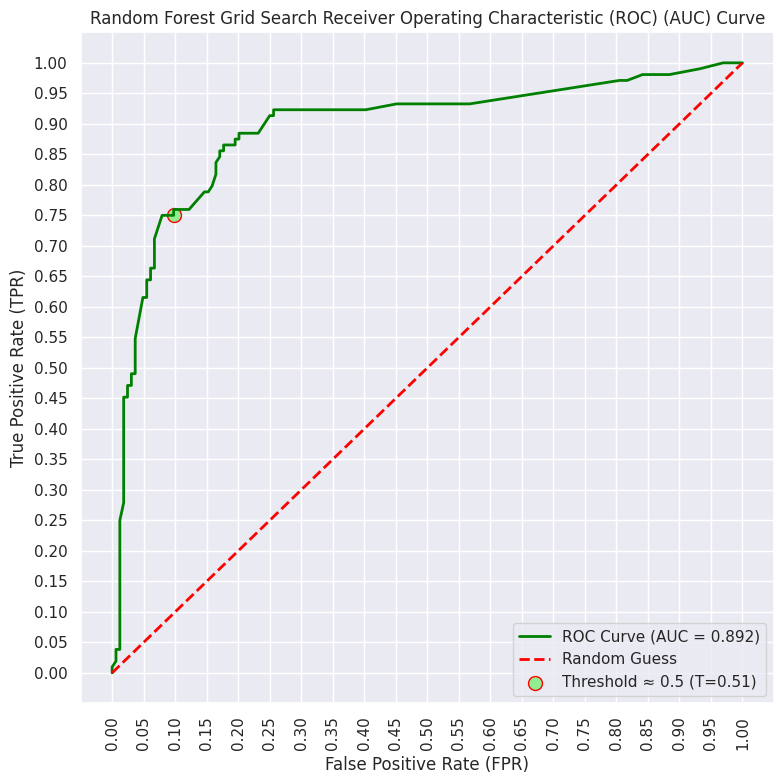

In [29]:
# Call the plot_roc_curve function with the actual labels (ytest) and predicted probabilities
plot_roc_curve(ytest, random_forest_model_with_grid_search_cv_tuned_predictions_probabilities, 'Random Forest Grid Search')

# 18: Hyperparameters Tuning Using Randomized Search

## 🌲 Initialize the Random Forest Classifier

The following line initializes a `RandomForestClassifier` model with a fixed `random_state` to ensure reproducible results across different runs of the code:

In [30]:
# Initialize Random Forest model with fixed random state for reproducibility
random_forest_model = RandomForestClassifier(random_state=random_state_value)

## 🔧 Random Forest Hyperparameter Ranges

These parameters define the search space for tuning a Random Forest Classifier using techniques like Grid Search or Randomized Search.

#### 🌲 Number of Trees (`n_estimators`)

In [31]:
# Number of trees in random forest
number_of_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
# Maximum number of levels in tree
maximum_depth = [int(x) for x in np.linspace(10, 110, num=11)]
maximum_depth.append(None)
# Minimum number of samples required to split a node
minumum_samples_split = [2, 5, 10]

## 🧮 Define Hyperparameter Grid for Randomized Search

This dictionary contains the range of hyperparameters used to tune a `RandomForestClassifier` using `RandomizedSearchCV`

In [32]:
grid_for_random_forest_tuned_with_random_search = {"n_estimators": number_of_estimators, "max_depth": maximum_depth, "min_samples_split": minumum_samples_split}

## 🔍 RandomizedSearchCV for Random Forest Hyperparameter Tuning

To optimize the performance of the Random Forest Classifier, `RandomizedSearchCV` is used to search through a defined range of hyperparameters.


In [33]:
random_forest_model_with_random_search = RandomizedSearchCV(estimator=random_forest_model, param_distributions=grid_for_random_forest_tuned_with_random_search, n_iter=50, cv=5, verbose=2, random_state=random_state_value)
# Fit the random search model
random_forest_model_with_random_search.fit(xtrain, ytrain.values.ravel())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .max_depth=50, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END .max_depth=50, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END .max_depth=50, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END .max_depth=50, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END .max_depth=50, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=780; total time=   1.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=780; total time=   1.1s
[CV] END max_depth=30, min_samples_split=10, n_estimators=780; total time=   1.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=780; total time=   1.0s
[CV] END max_depth=30, min_samples_split=10, n_estimators=780; total time=   1.1s
[CV] END max_depth=90, min_samples_split=10, n_estimators=890; total time=   1.2s
[CV] END max_depth=90, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=30, verbose=2)

## 🏆 Retrieving the Best Random Forest Model  

After running `RandomizedSearchCV`, we can extract the best-performing model with optimized hyperparameters using:  


In [34]:
random_forest_model_with_random_search.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_split=10, n_estimators=230,
                       random_state=30)

## 🧠 Assign the Best Estimator to a Readable Variable

After completing the randomized search, the best-performing model can be extracted and stored for easier use in further steps:


In [35]:
random_forest_model_with_random_search_tuned = random_forest_model_with_random_search.best_estimator_

## 🏋️‍♂️ Train the Best-Tuned Random Forest Model

Once the best estimator has been selected from `RandomizedSearchCV`, it needs to be **fitted to the training data** to finalize the model:


In [36]:
random_forest_model_with_random_search_tuned.fit(xtrain, ytrain.values.ravel())

RandomForestClassifier(max_depth=70, min_samples_split=10, n_estimators=230,
                       random_state=30)

## 📈 Make Predictions with the Tuned Random Forest Model

After training the optimized model on the full training dataset, you can now generate predictions on the test set:


In [37]:
random_forest_model_with_random_search_tuned_predictions = random_forest_model_with_random_search_tuned.predict(xtest)

## 📊 Generate Class Probabilities with the Tuned Random Forest Model

To evaluate model performance using probability-based metrics (e.g., ROC-AUC), you can retrieve the predicted class probabilities instead of just class labels:


In [38]:
random_forest_model_with_random_search_tuned_predictions_probabilities = random_forest_model_with_random_search_tuned.predict_proba(xtest)[:, 1]

## 🧪 Evaluate Model Performance Using Classification Metrics

After generating both class predictions and predicted probabilities, we can now assess the model's performance using a custom evaluation function:


In [39]:
# Call the evaluate_model_performance function to generate the classification report and evaluation metrics
# rf_m_rs_t_ = random_forest_model_with_random_search_tuned_
rf_m_rs_t_accuracy, rf_m_rs_t_precision, rf_m_rs_t_recall, rf_m_rs_t_f1_score, rf_m_rs_t_auc = evaluate_model_performance(
                                                        y_actual_values=ytest,
                                                        predictions=random_forest_model_with_random_search_tuned_predictions,
                                                        predicted_probabilities=random_forest_model_with_random_search_tuned_predictions_probabilities)


 [--Classification Report--] 

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       164
           1       0.79      0.71      0.75       104

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268


 [----Confusion Matrix-----] 

             pred_Survived (TP/FP) pred_Not Survived (FN/TN)
Survived                     TP 74                     FN 30
Not Survived                 FP 20                    TN 144 


 [---------Metrics---------] 

Accuracy:          0.8134328358208955
Precision:         0.7872340425531915
Recall:            0.7115384615384616
F1 Score:          0.7474747474747475
Area Under Curve:  0.8916803470919324

------------------------------ 

Higher TPR (True Positive Rate) is better!
TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').
In other word

## 📈 Plot the ROC Curve for Model Evaluation

To evaluate the performance of the tuned Random Forest model in terms of its ability to discriminate between classes, we can plot the **Receiver Operating Characteristic (ROC) curve**:


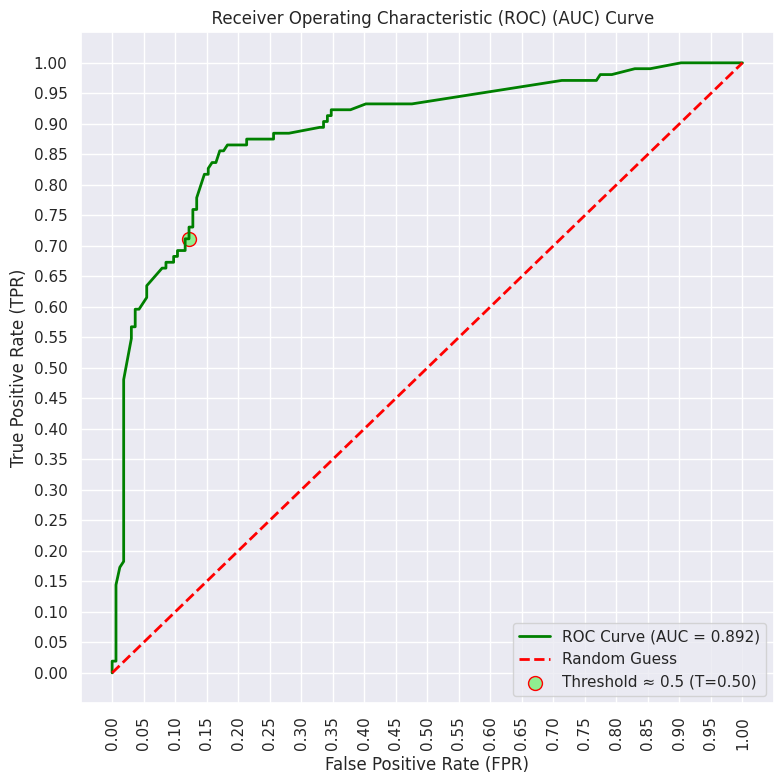

In [40]:
# Call the plot_roc_curve function with the actual labels (ytest) and predicted probabilities
plot_roc_curve(ytest, random_forest_model_with_random_search_tuned_predictions_probabilities)

# 19: 📝 Create a Comparison Dictionary for Model Evaluation

To compare the performance of different Random Forest models, we can create a dictionary that holds various evaluation metrics (e.g., Accuracy, Precision, Recall, F1 Score, AUC) for each model:


In [41]:
comparison_dict = {"Algorithm": ["Random Forest", "Tuned Random Forest(Grid)", "Tuned Random Forest(Random)"],
                   "Accuracy": [rf_bs_m_accuracy, rf_gs_cv_td_m_accuracy, rf_m_rs_t_accuracy],
                   "Precision": [rf_bs_m_precision, rf_gs_cv_td_m_precision, rf_m_rs_t_precision],
                   "Recall": [rf_bs_m_recall, rf_gs_cv_td_m_recall, rf_m_rs_t_recall],
                   "F1 Score": [rf_bs_m_f1_score, rf_gs_cv_td_m_f1_score, rf_m_rs_t_recall],
                   "AUC": [rf_bs_m_auc, rf_gs_cv_td_m_auc, rf_m_rs_t_auc],
                   "Model Name Code ": ["random_forest_base_model", "random_forest_model_with_grid_search_cv_tuned", "random_forest_model_with_random_search_tuned"]
                   }

## 🧮 Create and Sort the Model Comparison DataFrame

Now that we have the comparison dictionary, we can convert it into a **pandas DataFrame** to better visualize and sort the models by their evaluation metrics:


In [42]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'AUC'], ascending=False, ignore_index=True)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC,Model Name Code
0,Tuned Random Forest(Grid),0.843284,0.829787,0.750000,0.787879,0.891739,random_forest_model_with_grid_search_cv_tuned
1,Tuned Random Forest(Random),0.813433,0.787234,0.711538,0.711538,0.891680,random_forest_model_with_random_search_tuned
2,Random Forest,0.809701,0.784946,0.701923,0.741117,0.872156,random_forest_base_model


## **Final Selected Model for Predictions**

This model can be used for making predictions on new data without the need for retraining.


In [43]:
#your final slected model for predictions
final_model = random_forest_model_with_grid_search_cv_tuned

# 20: Load the CSV File into a DataFrame and Display the First Few Rows

To load a CSV file into a pandas DataFrame, we use the `pd.read_csv()` function. We can then create a copy of the DataFrame and display the first few rows to examine the structure of the dataset.


In [44]:
# Load the CSV file into a DataFrame
test = pd.read_csv('/kaggle/input/titanic-dataset/competition_clean.csv')

# Create a copy of the DataFrame
dataframe_test = test.copy()

# Display the first few rows of the dataset
dataframe_test.head()


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


## 21: Display the Shape of the DataFrame

To understand the dimensions of the dataset, we can use the `shape` attribute of the DataFrame. This returns the number of rows and columns in the dataset.


In [45]:
# Display the shape of the DataFrame (number of rows and columns)
dataframe_test.shape

(418, 10)

## 22: Perform One-Hot Encoding on Specified Categorical Columns

To convert categorical variables into a numerical format, we use One-Hot Encoding. This technique creates new binary columns for each category in the specified columns. After encoding, we convert all columns to integers for consistency.


In [46]:
# Perform One-Hot Encoding on specified categorical columns
dataframe_OneHot = pd.get_dummies(dataframe_test, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat'])

# Convert the data type of all columns to integers (for consistency)
dataframe_OneHot = dataframe_OneHot.astype(int)

# Create a copy of the OneHot encoded DataFrame to preserve original data
dataframe_test = dataframe_OneHot.copy()

# Display the first few rows of the modified DataFrame
dataframe_test.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 23: Extract and Drop the 'PassengerId' Column

In this step, we first extract the `PassengerId` column from the DataFrame, as it may be useful for identification purposes later. After extracting it, we drop the column from the DataFrame, since it is no longer needed for modeling.


In [47]:
# Extract 'PassengerId' column before dropping it
PassengerID = dataframe_test['PassengerId']

# Drop the 'PassengerId' column from the DataFrame as it's no longer needed for modeling
dataframe_test.drop('PassengerId', axis=1, inplace=True)

# Display the modified DataFrame after removing 'PassengerId'
dataframe_test.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


## 24: Make Predictions Using the Trained Decision Tree Model

After preprocessing the test data, we can use the trained decision tree model to make predictions on the test set. The `predict()` function of the model is used to generate predictions.


In [48]:
# Use the trained decision tree model to make predictions on the processed test data
predictions_final = final_model.predict(dataframe_test)

# Display the predictions (optional, you can inspect the results)
print(predictions_final)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 1]


## 25: Create a Submission DataFrame with 'PassengerId' and Predicted 'Survived' Values

To prepare the results for submission, we create a new DataFrame that includes the `PassengerId` and the model's predicted `Survived` values. This is typically done when preparing the output for competitions or evaluations.


In [49]:
# Create a DataFrame for the submission with 'PassengerId' and the predicted 'Survived' values
submission = pd.DataFrame({'PassengerId': PassengerID, 'Survived': predictions_final})

# Display the first few rows of the submission DataFrame to verify the structure
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 26: Display the Shape of the Submission DataFrame

To confirm the dimensions of the submission DataFrame, we use the `shape` attribute. This will give us the number of rows and columns in the DataFrame, ensuring the structure is as expected.


In [50]:
# Display the shape of the submission DataFrame
submission.shape

(418, 2)

## 27: Save the Submission DataFrame to a CSV File

After preparing the submission DataFrame, we save it as a CSV file without the index. This file can be used for submission or further analysis.


In [51]:
# Save the submission DataFrame to a CSV file without the index
submission.to_csv('submission.csv', index=False)

# Confirm the file has been saved (optional)
print("Submission file has been saved as 'submission.csv'")

Submission file has been saved as 'submission.csv'


# 👋 Muhammad Muhammad Mudasar Sabir

I’m a Machine Learning and Deep Learning enthusiast with a strong interest in Computer Vision and Generative AI. I enjoy solving real-world problems using intelligent, data-driven approaches. My focus areas include:

- 🤖 Machine Learning & Deep Learning  
- 🧠 Computer Vision & Generative Models  
- 📊 Data Analysis & Feature Engineering  
- 🚀 Model Evaluation & Deployment  

---

## 🔗 Connect with Me

- 🧠 **Kaggle**: [https://www.kaggle.com/mudasarsabir](https://www.kaggle.com/mudasarsabir)  
- 💻 **GitHub**: [https://github.com/mudasarsabir/Titanic-Competition-By-Decision-Tree-Classification/tree/main](https://github.com/mudasarsabir/Titanic-Competition-By-Decision-Tree-Classification/tree/main)  
- 🔗 **LinkedIn**: [https://www.linkedin.com/in/mudasarsabir/](https://www.linkedin.com/in/mudasarsabir/)  
- 🌐 **Portfolio**: [https://muddasarsabir.netlify.app](https://muddasarsabir.netlify.app)

---

## 📌 Featured Project

### 🎯 Titanic Survival Prediction - Decision Tree
- GitHub: [View Repository](https://github.com/mudasarsabir/Titanic-Competition-By-Decision-Tree-Classification/tree/main)  
- Kaggle: [View Notebook](https://www.kaggle.com/code/mudasarsabir/titanic-competition-by-decision-tree)  

A beginner-friendly ML project applying Decision Tree classification to predict Titanic passenger survival, including EDA, preprocessing, and model evaluation.

---

## 📬 Get in Touch

I'm open to collaboration, research, and AI-focused opportunities. Let’s connect!
